# Global Spread of COVID-19 with py5

In [1]:
import pandas as pd
from PIL import Image
import py5
py5.__version__

'0.3a4'

In [2]:
%load_ext py5

# Load Data

Data loaded with the pandas library.

In [3]:
data = pd.read_csv('data/covid_spread/covid-spread-data.csv', index_col=0)

data.head()

,capital,lat,lng,date,week
name,,,,,
China,Beijing,39.916667,116.383333,2020-01-19,3
South Korea,Seoul,37.550000,126.983333,2020-02-21,8
Japan,Tokyo,35.683333,139.750000,2020-02-22,8
Italy,Rome,41.900000,12.483333,2020-02-24,9
Iran,Tehran,35.700000,51.416667,2020-02-27,9


# Load Map

Image object loaded with PIL.

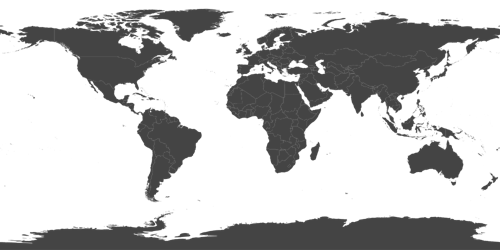

In [4]:
map_img = Image.open('data/covid_spread/world-map.png')

map_img.resize((500, 250))

# Make Static Image

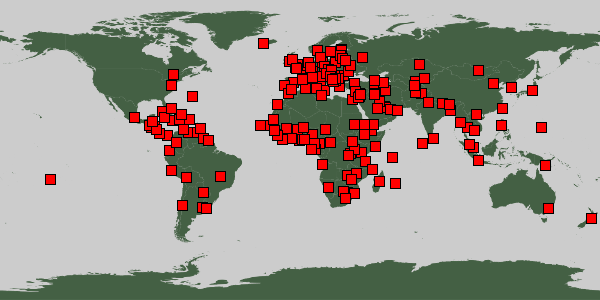

In [5]:
%%py5draw 600 300

# load the Py5Image object directly from the world_map.png file using py5
# world_map = py5.load_image('data/world_map.png')

# convert the previously loaded PIL Image object to a Py5Image object
world_map = py5.convert_image(map_img)

world_map.load_np_pixels()
world_map.np_pixels[:, :, 2] = 96
world_map.update_np_pixels()
py5.image(world_map, 0, 0, py5.width, py5.height)

py5.rect_mode(py5.CENTER)
py5.fill(255, 0, 0)

for d in data.itertuples():
    x = py5.width * (0.5 + d.lng / 360)
    y = py5.height * (0.5 - d.lat / 180)
    py5.rect(x, y, 10, 10)

# Write py5 Sketch Code

This code is similar to the previous code except it is divided up into 3 functions called `settings`, `setup`, and `draw`. This is similar to what you have in p5 and Processing.

## settings function

In [6]:
world_map = None
week = 0

def settings():
    py5.size(800, 400)

## setup function

In [7]:
def setup():
    py5.rect_mode(py5.CENTER)
    py5.frame_rate(4)

    py5.text_font(py5.create_font('DejaVu Serif', 40))

    global world_map
    world_map = py5.convert_image(map_img)
    world_map.load_np_pixels()
    world_map.np_pixels[:, :, 2] = 96
    world_map.update_np_pixels()

## draw function

In [8]:
def draw():
    py5.background(255)

    global week
    week += 1
    
    py5.image(world_map, 0, 0, py5.width, py5.height)

    py5.fill(255, 0, 0)
    py5.text(f'Week {week:02}', 40, py5.height - 80)
    
    for d in data.query("week <= @week").itertuples():
        x = py5.width * (0.5 + d.lng / 360)
        y = py5.height * (0.5 - d.lat / 180)
        py5.rect(x, y, 10, 10)
    
    if week == 33:
        py5.exit_sketch()

# Run Sketch

In [9]:
py5.run_sketch()

img = %py5screenshot -w 5

<class 'PIL.PngImagePlugin.PngImageFile'>


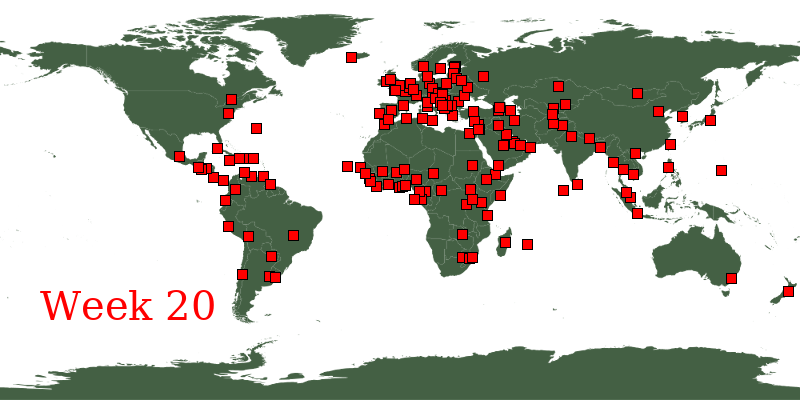

In [10]:
print(type(img))

img

# Make GIF

In [11]:
week = 0

py5.run_sketch()

%py5animatedgif images/covid_spread/covid-spread.gif 33 0 400

collecting frame 33/33


'images/covid_spread/covid-spread.gif'

# View Results

![covid spread](images/covid_spread/covid-spread.gif)